In [1]:
import pandas as pd
import numpy as np

## Data preprocessing

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
path = r"C:\Users\ss\Downloads\Telegram Desktop\ChatExport_2023-01-12\velo.json"
data = pd.read_json(path)
data

,name,type,id,messages
0,ВелоЧат 🚵‍♂️💨,public_supergroup,1118817811,"{'id': 1, 'type': 'service', 'date': '2017-03-..."
1,ВелоЧат 🚵‍♂️💨,public_supergroup,1118817811,"{'id': 4, 'type': 'service', 'date': '2017-03-..."
2,ВелоЧат 🚵‍♂️💨,public_supergroup,1118817811,"{'id': 5, 'type': 'message', 'date': '2017-03-..."
3,ВелоЧат 🚵‍♂️💨,public_supergroup,1118817811,"{'id': 6, 'type': 'message', 'date': '2017-03-..."
4,ВелоЧат 🚵‍♂️💨,public_supergroup,1118817811,"{'id': 7, 'type': 'message', 'date': '2017-03-..."
...,...,...,...,...
521063,ВелоЧат 🚵‍♂️💨,public_supergroup,1118817811,"{'id': 596685, 'type': 'message', 'date': '202..."
521064,ВелоЧат 🚵‍♂️💨,public_supergroup,1118817811,"{'id': 596686, 'type': 'message', 'date': '202..."
521065,ВелоЧат 🚵‍♂️💨,public_supergroup,1118817811,"{'id': 596687, 'type': 'message', 'date': '202..."
521066,ВелоЧат 🚵‍♂️💨,public_supergroup,1118817811,"{'id': 596688, 'type': 'message', 'date': '202..."


In [4]:
messages_df = pd.json_normalize(data.messages)
messages_df

,id,type,date,date_unixtime,actor,actor_id,action,title,text,text_entities,members,from,from_id,reply_to_message_id,photo,width,height,file,thumbnail,media_type,sticker_emoji,edited,edited_unixtime,forwarded_from,mime_type,duration_seconds,location_information.latitude,location_information.longitude,message_id,performer,inviter,via_bot,game_message_id,score,game_title,game_description,game_link,poll.question,poll.closed,poll.total_voters,poll.answers,live_location_period_seconds,saved_from,duration
0,1,service,2017-03-10T03:59:09,1489107549,ВелоЧат 🚵‍♂️💨,channel1118817811,migrate_from_group,Велолюбители Дзержинска,,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4,service,2017-03-11T19:59:29,1489251569,Alexey S,user107515585,invite_members,NaN,,[],[Alexey S],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5,message,2017-03-11T20:01:06,1489251666,NaN,NaN,NaN,NaN,Привет первому 😄👍,"[{'type': 'plain', 'text': 'Привет первому 😄👍'}]",NaN,D Egorof,user92911163,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6,message,2017-03-11T20:01:43,1489251703,NaN,NaN,NaN,NaN,Привет!,"[{'type': 'plain', 'text': 'Привет!'}]",NaN,Alexey S,user107515585,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,7,message,2017-03-11T20:23:55,1489253035,NaN,NaN,NaN,NaN,Из Дзержинска?,"[{'type': 'plain', 'text': 'Из Дзержинска?'}]",NaN,D Egorof,user92911163,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
521063,596685,message,2023-01-11T22:47:06,1673466426,NaN,NaN,NaN,NaN,По факту,"[{'type': 'plain', 'text': 'По факту'}]",NaN,Глеб,user979403883,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
521064,596686,message,2023-01-11T22:47:38,1673466458,NaN,NaN,NaN,NaN,"Пойду-ка я тоже чайку накачу, авось и меня про...","[{'type': 'plain', 'text': 'Пойду-ка я тоже ча...",NaN,Olegin_75,user171284469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
521065,596687,message,2023-01-11T22:47:54,1673466474,NaN,NaN,NaN,NaN,это как я и gt.\nпусть там gt сделают самый ох...,"[{'type': 'plain', 'text': 'это как я и gt. пу...",NaN,Евген,user976152764,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
521066,596688,message,2023-01-12T02:19:45,1673479185,NaN,NaN,NaN,NaN,Капец зашел с утра в велочат а тут больше 300 ...,"[{'type': 'plain', 'text': 'Капец зашел с утра...",NaN,Hon GilDon,user375683581,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
messages_df = messages_df[messages_df.forwarded_from.isnull()]
messages_df.shape

(515556, 44)

In [6]:
messages_df = messages_df[['from_id', 'text']]
messages_df

,from_id,text
0,NaN,
1,NaN,
2,user92911163,Привет первому 😄👍
3,user107515585,Привет!
4,user92911163,Из Дзержинска?
...,...,...
521063,user979403883,По факту
521064,user171284469,"Пойду-ка я тоже чайку накачу, авось и меня про..."
521065,user976152764,это как я и gt.\nпусть там gt сделают самый ох...
521066,user375683581,Капец зашел с утра в велочат а тут больше 300 ...


In [7]:
messages_df.rename(columns={"from_id": "id"}, inplace=True)

In [8]:
def count_words(sentence):
    if not isinstance(sentence, str):
        return 0
    return len(sentence.split())

In [9]:
messages_df['words_count'] = messages_df.text.map(count_words)
messages_df

,id,text,words_count
0,NaN,,0
1,NaN,,0
2,user92911163,Привет первому 😄👍,3
3,user107515585,Привет!,1
4,user92911163,Из Дзержинска?,2
...,...,...,...
521063,user979403883,По факту,2
521064,user171284469,"Пойду-ка я тоже чайку накачу, авось и меня про...",30
521065,user976152764,это как я и gt.\nпусть там gt сделают самый ох...,25
521066,user375683581,Капец зашел с утра в велочат а тут больше 300 ...,13


In [10]:
messages_df = messages_df[messages_df['words_count'] > 10]
messages_df.reset_index(drop=True, inplace=True)
messages_df

,id,text,words_count
0,user92911163,Да как то Страва не рекламируется в пабликах в...,12
1,user92911163,Мне друг рассказал про страву) не помню уже ко...,15
2,user92911163,"Бесит, что в современном мире во всем нужно ра...",596
3,user92911163,"нстаграме. Профиль открыт, последняя фотографи...",615
4,user92911163,"ром. Кстати, ты ведь давно хотел приобрести хо...",32
...,...,...,...
98269,user979403883,Да просто не понимаю зачем ты мусолишь одну и ...,15
98270,user171284469,"Пойду-ка я тоже чайку накачу, авось и меня про...",30
98271,user976152764,это как я и gt.\nпусть там gt сделают самый ох...,25
98272,user375683581,Капец зашел с утра в велочат а тут больше 300 ...,13


In [11]:
messages_df.isna().sum()

id             0
text           0
words_count    0
dtype: int64

In [12]:
active = messages_df['id'].value_counts().nlargest(n=20, keep='all')
active

user210988160     11691
user404974250     10976
user197894952      8423
user171284469      6949
user126315380      5638
user550802873      4082
user352873749      3131
user976152764      2888
user130711673      2441
user329716845      1691
user1044319687     1544
user385570172      1380
user224684962      1121
user421178130      1067
user1053614038     1061
user4180997        1037
user301581509       965
user501890406       960
user47850071        835
user307522483       832
Name: id, dtype: int64

In [13]:
new_id = dict(zip(active.keys(), range(len(active) + 1)))
new_id

{'user210988160': 0,
 'user404974250': 1,
 'user197894952': 2,
 'user171284469': 3,
 'user126315380': 4,
 'user550802873': 5,
 'user352873749': 6,
 'user976152764': 7,
 'user130711673': 8,
 'user329716845': 9,
 'user1044319687': 10,
 'user385570172': 11,
 'user224684962': 12,
 'user421178130': 13,
 'user1053614038': 14,
 'user4180997': 15,
 'user301581509': 16,
 'user501890406': 17,
 'user47850071': 18,
 'user307522483': 19}

In [14]:
active_df = messages_df.loc[messages_df.id.isin(active.keys())]
active_df = active_df.copy()
active_df.reset_index(inplace=True, drop=True)
active_df.replace({'id': new_id}, inplace=True)
active_df

,id,text,words_count
0,0,"Всем привет, г.Чебоксары. Велосипед еще в проц...",13
1,16,"Потому что я войсил, и из-за этого багался бот...",18
2,16,Fire Eye Broil еще вот эти можешь чекнуть. Они...,11
3,16,Смотрю обзоры разные на польском. Так забавно....,22
4,16,"Хахахах, Поздравляю с преобретением. Ты потырк...",20
...,...,...,...
68707,3,Масла в огонь вам не подкинуть ? \nНе списывай...,13
68708,7,"поздравляю тебя с этим, я сразу обозначил то, ...",13
68709,7,"наверняка за тем же, зачем ты мне тут выше вся...",12
68710,3,"Пойду-ка я тоже чайку накачу, авось и меня про...",30


In [15]:
active_df['words_count'] = active_df['text'].map(count_words)
active_df['characters_count'] = active_df['text'].map(len)
active_df

,id,text,words_count,characters_count
0,0,"Всем привет, г.Чебоксары. Велосипед еще в проц...",13,91
1,16,"Потому что я войсил, и из-за этого багался бот...",18,109
2,16,Fire Eye Broil еще вот эти можешь чекнуть. Они...,11,59
3,16,Смотрю обзоры разные на польском. Так забавно....,22,141
4,16,"Хахахах, Поздравляю с преобретением. Ты потырк...",20,126
...,...,...,...,...
68707,3,Масла в огонь вам не подкинуть ? \nНе списывай...,13,67
68708,7,"поздравляю тебя с этим, я сразу обозначил то, ...",13,74
68709,7,"наверняка за тем же, зачем ты мне тут выше вся...",12,62
68710,3,"Пойду-ка я тоже чайку накачу, авось и меня про...",30,178


In [16]:
active_statistics = active_df.groupby('id', as_index=False).agg(
    number_of_messages=('id', 'count'),
    total_number_of_words=('words_count', 'sum'),
    mean_len_in_words=('words_count', 'mean'),
    mean_len_in_characters=('characters_count', 'mean'),
)
active_statistics

,id,number_of_messages,total_number_of_words,mean_len_in_words,mean_len_in_characters
0,0,11691,226704,19.391327,112.187324
1,1,10976,208032,18.953353,108.203535
2,2,8423,127939,15.189244,84.220230
3,3,6949,225663,32.474169,191.488560
4,4,5638,91775,16.277935,93.931713
5,5,4082,75427,18.477952,98.945860
6,6,3131,47895,15.297030,89.686682
7,7,2888,55774,19.312327,110.624307
8,8,2441,50512,20.693159,122.947153
9,9,1691,28597,16.911295,94.170313


In [17]:
for id in np.unique(active_df.id.values):
    user = active_df.loc[active_df.id == id]
    user_sample = user.sample(10, random_state=1)
    with open(fr'ActiveUsers\user_{id + 1}.txt', 'w', encoding='utf-8') as file:
        file.write('\n\n'.join(user_sample.text.values))

## Machine learning

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [19]:
X = active_df['text'].values
y = active_df['id'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, y_train

(array(['только как я уже говорил срам идет в спицы только если цепь слетает, а сенсах в процессе работы',
        'но на руль еще не пришла, так что это пока еще теория)',
        'Потому что в России всё через жопу и вечная надежда на авось. Там в фуре какие-нибудь коробки стояли, дверь открыли, посмотрели и отпустили. Потому что таких фур тысячи',
        ...,
        'не считая норки там катить его тяжко было и пульс тоже не маленький',
        'Есть режим прозрачности. Подносишь руку к правому уху и слышишь все звуки снаружи',
        'ты просто лось)) да и проф.спортсменов у вас наверное нет 😉 тем более на шоссерах'],
       dtype=object),
 array([2, 0, 4, ..., 5, 4, 0], dtype=int64))

In [20]:
clf = make_pipeline(CountVectorizer(max_features=20_000), LogisticRegression())
parameters = [
    {
        'countvectorizer__ngram_range' : [(1, 2), (1, 3), (2, 3)],
        'countvectorizer__lowercase' : [True, False],
        'countvectorizer__analyzer' : ['word']
    },
    {
        'countvectorizer__ngram_range' : [(2, 3), (3, 4), (4, 6)],
        'countvectorizer__lowercase' : [True, False],
        'countvectorizer__analyzer' : ['char']
    }
] 

clf_grid = GridSearchCV(clf, parameters, n_jobs=-1, cv=3, refit=True, verbose=3)

In [21]:
%%time
clf_grid.fit(X_train, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
CPU times: total: 54.4 s
Wall time: 17min 38s


C:\Users\ss\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('countvectorizer',
                                        CountVectorizer(max_features=20000)),
                                       ('logisticregression',
                                        LogisticRegression())]),
             n_jobs=-1,
             param_grid=[{'countvectorizer__analyzer': ['word'],
                          'countvectorizer__lowercase': [True, False],
                          'countvectorizer__ngram_range': [(1, 2), (1, 3),
                                                           (2, 3)]},
                         {'countvectorizer__analyzer': ['char'],
                          'countvectorizer__lowercase': [True, False],
                          'countvectorizer__ngram_range': [(2, 3), (3, 4),
                                                           (4, 6)]}],
             verbose=3)

In [22]:
clf_grid.best_params_

{'countvectorizer__analyzer': 'char',
 'countvectorizer__lowercase': False,
 'countvectorizer__ngram_range': (2, 3)}

In [23]:
clf_grid.best_score_

0.6796194218559553

In [24]:
y_pred = clf_grid.predict(X_test)

In [25]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.83      0.81      2290
           1       0.78      0.80      0.79      2200
           2       0.67      0.75      0.71      1705
           3       0.89      0.90      0.90      1400
           4       0.59      0.67      0.63      1076
           5       0.77      0.84      0.80       805
           6       0.46      0.43      0.44       672
           7       0.63      0.59      0.61       591
           8       0.65      0.56      0.60       499
           9       0.64      0.58      0.61       360
          10       0.46      0.39      0.43       319
          11       0.52      0.43      0.47       293
          12       0.53      0.47      0.50       206
          13       0.72      0.53      0.61       215
          14       0.51      0.46      0.48       207
          15       0.46      0.35      0.40       193
          16       0.65      0.36      0.46       203
          17       0.46    

<AxesSubplot:>

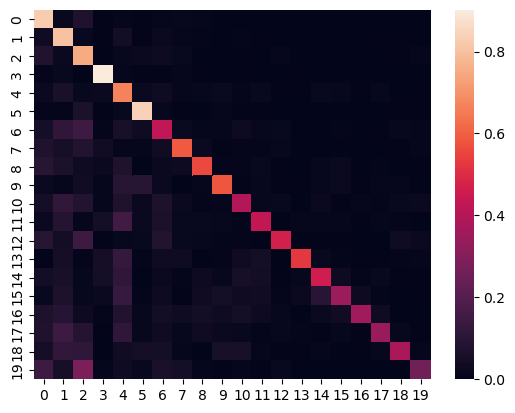

In [26]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cf_matrix = confusion_matrix(y_test, y_pred, normalize='true') 
sns.heatmap(cf_matrix)

In [27]:
report = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True)).transpose()
report = report.iloc[0:20, :-1]
report.index = report.index.astype(int)
report = pd.concat([active_statistics, report], axis=1, join="inner")
report

,id,number_of_messages,total_number_of_words,mean_len_in_words,mean_len_in_characters,precision,recall,f1-score
0,0,11691,226704,19.391327,112.187324,0.788421,0.826638,0.807077
1,1,10976,208032,18.953353,108.203535,0.775877,0.804091,0.789732
2,2,8423,127939,15.189244,84.220230,0.674187,0.753666,0.711714
3,3,6949,225663,32.474169,191.488560,0.890063,0.902143,0.896062
4,4,5638,91775,16.277935,93.931713,0.592593,0.669145,0.628546
5,5,4082,75427,18.477952,98.945860,0.769318,0.840994,0.803561
6,6,3131,47895,15.297030,89.686682,0.460674,0.427083,0.443243
7,7,2888,55774,19.312327,110.624307,0.626571,0.590525,0.608014
8,8,2441,50512,20.693159,122.947153,0.651054,0.557114,0.600432
9,9,1691,28597,16.911295,94.170313,0.644172,0.583333,0.612245


<AxesSubplot:xlabel='number_of_messages', ylabel='f1-score'>

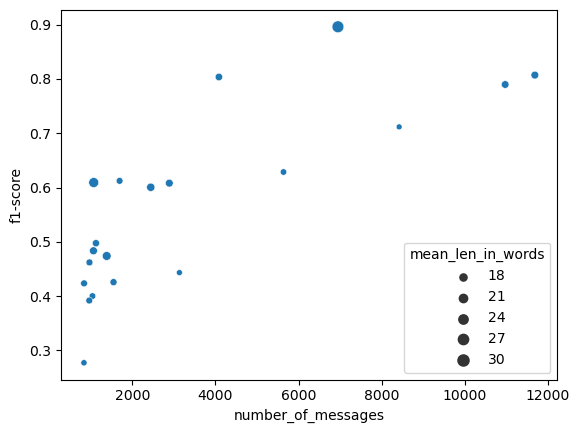

In [38]:
graph = sns.scatterplot(data=report, 
                x="number_of_messages", 
                y="f1-score", 
                size="mean_len_in_words")

sns.move_legend(graph, "lower right")
graph